## Lab2 - Analiza danych - Data frames

Wszystkie punkty przedstawić w postaci notatnika Julii.
Proszę przesłać 2 pliki w formacie HTML i IPYNB

- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (LinearAlgebra.dot) i mnożenia macierzy kwadratowej przez wektor z użyciem operatora *.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów. Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny być zapisywane do jednego pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do jednego DataFrame w języku Julia.
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego.
- Proszę poukładac wykresy w tabelkę za pomocą opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.


In [1]:
using LinearAlgebra

In [2]:
A = [1 2 3; 4 5 6; 7 8 200];

In [3]:
B = [100 100 300; 300 500 330; 246 37 839];

In [4]:
C = [200 200 400];

In [34]:
function DotProduct(A,B)
    return sum(a*b for (a,b) in zip(A,B))
end

DotProduct (generic function with 1 method)

In [35]:
DotProduct([1 2 7], [3 -5 7]) == dot([3 -5 7], [1 2 7])

true

In [36]:
function VectorMatrixProduct(A,B)
    len = size(B, 2)
    res = zeros(1, len)
    for i=1:len
        res[i] = DotProduct(A, B[:,i])
    end
    return res
end       

VectorMatrixProduct (generic function with 1 method)

In [37]:
VectorMatrixProduct(C,B) == C*B

true

# Execution time

In [11]:
using Pkg
using DataFrames;
Pkg.add("Random");
using Random;

   Updating registry at `C:\Users\basia\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\basia\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\basia\.julia\environments\v1.5\Manifest.toml`


In [38]:
res = DataFrame(size = Int[], sample_nr = Int[], dot_time = Float64[], prod_time = Float64[])

for size in 600:300:6000
    for sample_nr in 1:10
        M = rand(1:size, size, size)
        V1 = rand(1:size, 1, size)
        V2 = rand(1:size, 1, size)
        dot_time = @elapsed DotProduct(V1, V2)
        prod_time = @elapsed VectorMatrixProduct(V1, M)
        push!(res, [size sample_nr dot_time prod_time])
    end
end
res

,size,sample_nr,dot_time,prod_time
,Int64,Int64,Float64,Float64
1,600,1,5.99e-7,0.0015195
2,600,2,8.0e-7,0.0018476
3,600,3,6.0e-7,0.0016477
4,600,4,9.01e-7,0.0028006
5,600,5,7.01e-7,0.0029992
6,600,6,8.0e-7,0.0024023
7,600,7,8.01e-7,0.0032918
8,600,8,8.01e-7,0.002568
9,600,9,8.0e-7,0.0028507


In [39]:
using CSV
CSV.write("results.csv", res)
df = DataFrame(CSV.File("results.csv"))

,size,sample_nr,dot_time,prod_time
,Int64,Int64,Float64,Float64
1,600,1,5.99e-7,0.0015195
2,600,2,8.0e-7,0.0018476
3,600,3,6.0e-7,0.0016477
4,600,4,9.01e-7,0.0028006
5,600,5,7.01e-7,0.0029992
6,600,6,8.0e-7,0.0024023
7,600,7,8.01e-7,0.0032918
8,600,8,8.01e-7,0.002568
9,600,9,8.0e-7,0.0028507


In [14]:
using Statistics

In [40]:
res_grouped = combine(groupby(df, :size), "dot_time" => mean, "prod_time" => mean, "dot_time" => std, "prod_time" => std)

,size,dot_time_mean,prod_time_mean,dot_time_std,prod_time_std
,Int64,Float64,Float64,Float64,Float64
1,600,7.403e-7,0.00246065,1.07891e-7,0.000599414
2,900,9.605e-7,0.00355122,9.64967e-8,0.00105486
3,1200,1.21e-6,0.00702653,1.28672e-7,0.00250668
4,1500,1.4099e-6,0.00776022,1.66208e-7,0.000373644
5,1800,1.79e-6,0.0136566,4.06776e-7,0.00448652
6,2100,1.7398e-6,0.0173353,6.98917e-8,0.00268113
7,2400,1.9799e-6,0.0197687,1.13512e-7,0.00424347
8,2700,2.1201e-6,0.0283488,4.21174e-8,0.00342757
9,3000,2.4e-6,0.0374315,1.49371e-7,0.00410824


In [17]:
using Plots

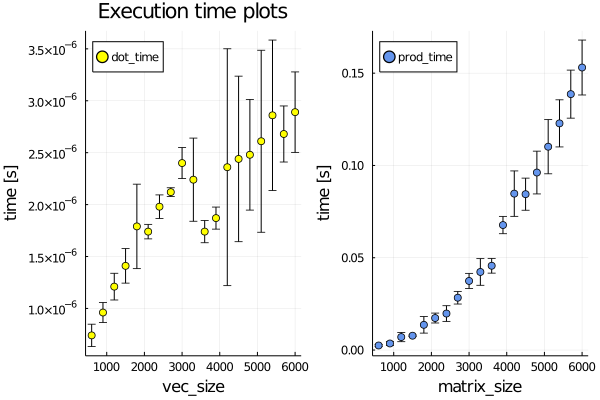

In [41]:
dot_plot = scatter(res_grouped.size, res_grouped.dot_time_mean, colour = :yellow , yerr=res_grouped.dot_time_std,
            xlabel = "vec_size", ylabel = "time [s]", label = "dot_time", title = "Execution time plots", legend = :topleft)
prod_plot = scatter(res_grouped.size, res_grouped.prod_time_mean, colour = :cornflowerblue , yerr=res_grouped.prod_time_std,
            xlabel = "matrix_size", ylabel = "time [s]", label = "prod_time", legend = :topleft)
plot(dot_plot, prod_plot, layout = 2)